In [1]:
library(zoo)
library(tseries)
library(urca)
library(vars)


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Loading required package: MASS
Loading required package: strucchange
Loading required package: sandwich
Loading required package: lmtest


In [2]:
series <- read.table(file = "datostesis.txt", header = TRUE, sep = "	", stringsAsFactors = FALSE)

In [3]:
tiempo <- series$Tiempo
tiempo <- as.yearqtr(format(tiempo), "%Y - %q")
dif_log_pib <- diff(log(series$PIB))
dif_log_ibif <- diff(log(series$IBIF))
dif_log_ipc <- diff(log(series$IPC))
polfit_log_ipc <- lm(log(series$IPC) ~ poly(tiempo, 2, raw=TRUE))
dif_log_ipcdt <- diff(polfit_log_ipc$residuals)

In [9]:
amat <- diag(3)
amat[2,1] <- NA
amat[3,1] <- NA
amat[3,2] <- NA


# Defino subperíodos

 Tomando el resultado de Luis de $8.5 \% $. A partir de 2005Q1 se empieza a tener anualmente niveles superiores a ese valor 
 
 Usando el $min T$ de los test de ZA estaba cerca de 2017Q3.
 
 Separo en tres períodos.

## Período 1993Q1 - 2004Q2 $\longrightarrow$ Baja Inflación

In [10]:
tiempo1 <- tiempo[2:48] 
dif_log_pib1 <- dif_log_pib[1:47]
dif_log_ibif1 <- dif_log_ibif[1:47]
dif_log_ipcdt1 <- dif_log_ipcdt[1:47]

In [11]:
dif_series1 <- cbind(dif_log_ipcdt1, dif_log_ibif1, dif_log_pib1)
colnames(dif_series1) <- c("ipc1", "ibif1", "pib1")

In [12]:
lags_var1 <- VARselect(dif_series1, lag.max = 10, type = "none")
lags_var1$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
    10      1      1      1

In [13]:
var_estimado1 <- VAR(dif_series1, p = 1, type = "none")

In [14]:
svar_estimado1 <- SVAR(var_estimado1, estmethod = "direct", Amat = amat)

### Funciones de impulso-respuesta para baja inflación

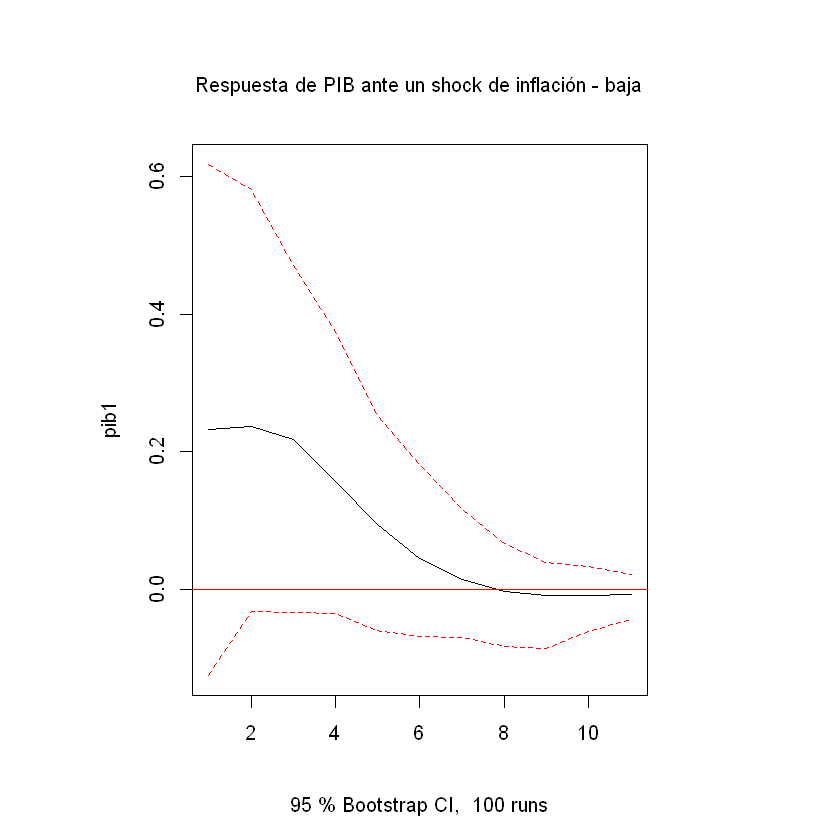

In [15]:
fun_pib1 <- irf(svar_estimado1, impulse = "ipc1", response = "pib1")
plot(fun_pib1, main = "Respuesta de PIB ante un shock de inflación - baja")

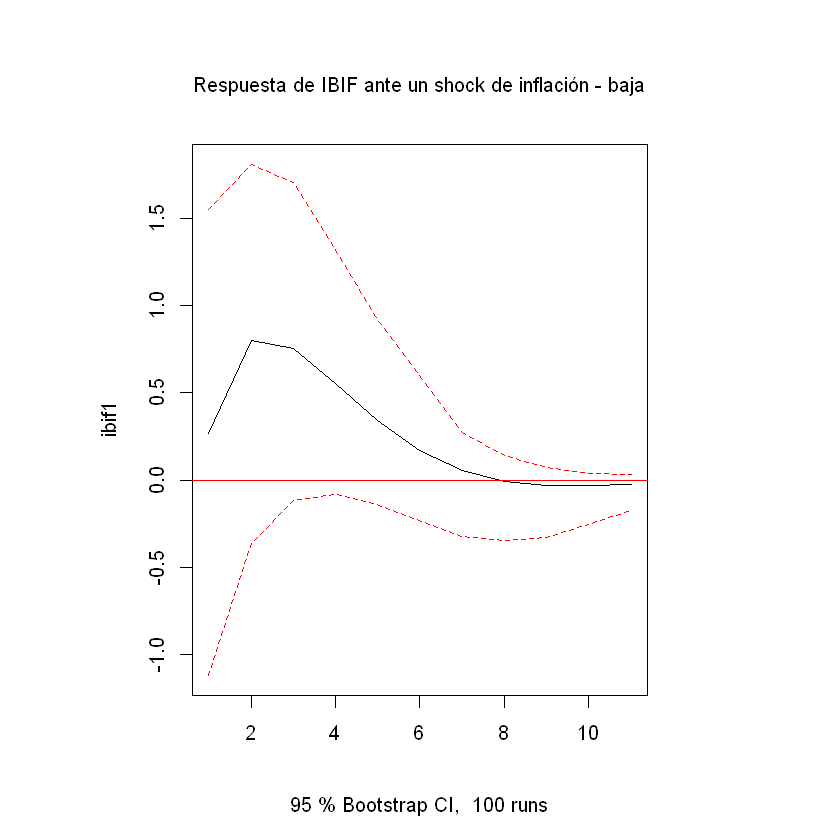

In [16]:
fun_ibif1 <- irf(svar_estimado1, impulse = "ipc1", response = "ibif1")
plot(fun_ibif1, main = "Respuesta de IBIF ante un shock de inflación - baja")

## Período 2005Q1 - 2017Q2 $\longrightarrow$ Inflación Media

In [17]:
tiempo2 <- tiempo[49:98] 
dif_log_pib2 <- dif_log_pib[48:97]
dif_log_ibif2 <- dif_log_ibif[48:97]
dif_log_ipcdt2 <- dif_log_ipcdt[48:97]

In [18]:
dif_series2 <- cbind(dif_log_ipcdt2, dif_log_ibif2, dif_log_pib2)
colnames(dif_series2) <- c("ipc2", "ibif2", "pib2")

In [19]:
lags_var2 <- VARselect(dif_series2, lag.max = 10, type = "none")
lags_var2$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
     1      1      1      1

In [20]:
var_estimado2 <- VAR(dif_series2, p = 1, type = "none")

In [21]:
svar_estimado2 <- SVAR(var_estimado2, estmethod = "direct", Amat = amat)

### Funciones de impulso-respuesta para baja media

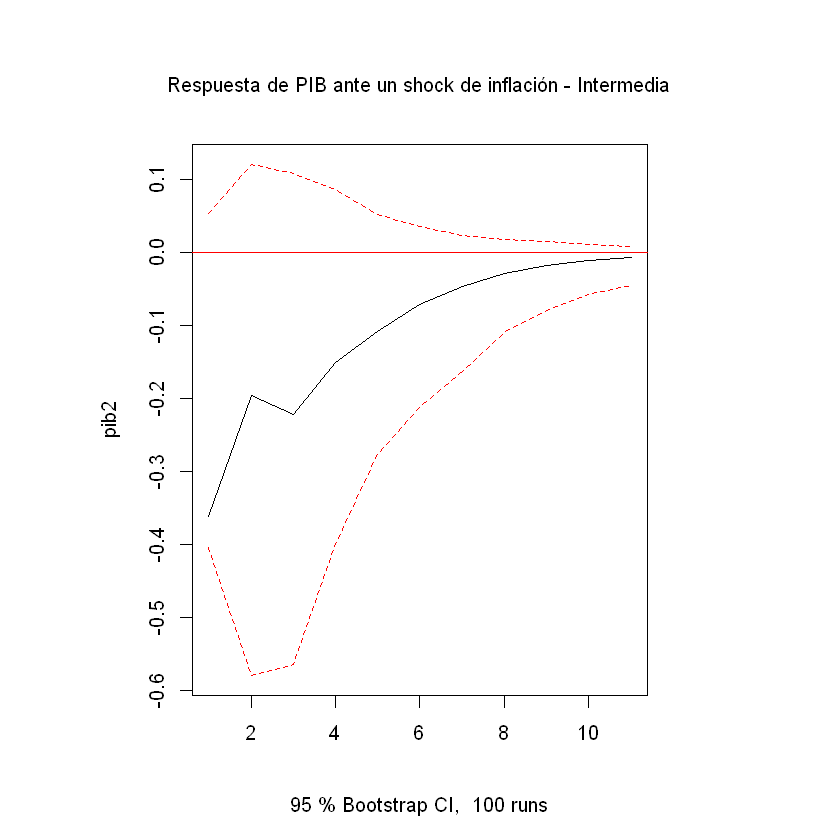

In [22]:
fun_pib2 <- irf(svar_estimado2, impulse = "ipc2", response = "pib2")
plot(fun_pib2, main = "Respuesta de PIB ante un shock de inflación - Intermedia")

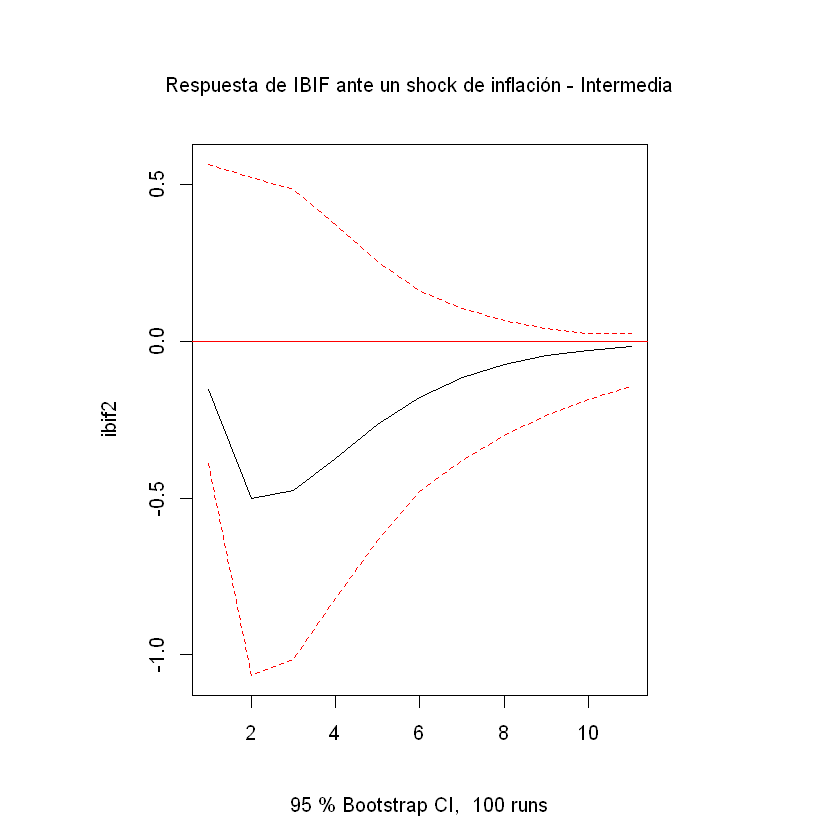

In [23]:
fun_ibif2 <- irf(svar_estimado2, impulse = "ipc2", response = "ibif2")
plot(fun_ibif2, main = "Respuesta de IBIF ante un shock de inflación - Intermedia")

## Período 2017Q3 - 2021Q4 $\longrightarrow$ Inflación Alta

In [24]:
tiempo3 <- tiempo[99:116]
dif_log_pib3 <- dif_log_pib[98:115]
dif_log_ibif3 <- dif_log_ibif[98:115]
dif_log_ipcdt3 <- dif_log_ipcdt[98:115]

In [25]:
dif_series3 <- cbind(dif_log_ipcdt3, dif_log_ibif3, dif_log_pib3)
colnames(dif_series3) <- c("ipc3", "ibif3", "pib3")

In [26]:
lags_var3 <- VARselect(dif_series3, lag.max = 10, type = "none")
lags_var3$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
     3      3      3      3

In [27]:
var_estimado3 <- VAR(dif_series3, p = 3, type = "none")

In [28]:
svar_estimado3 <- SVAR(var_estimado3, estmethod = "direct", Amat = amat)

### Funciones de impulso-respuesta para alta inflación

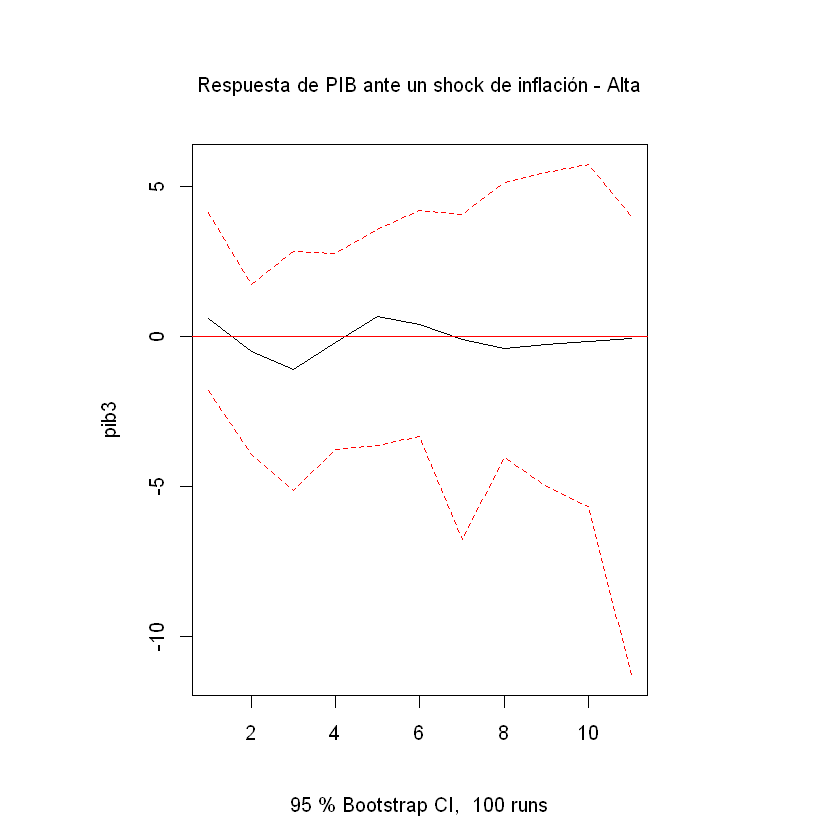

In [29]:
fun_pib3 <- irf(svar_estimado3, impulse = "ipc3", response = "pib3")
plot(fun_pib3, main = "Respuesta de PIB ante un shock de inflación - Alta")

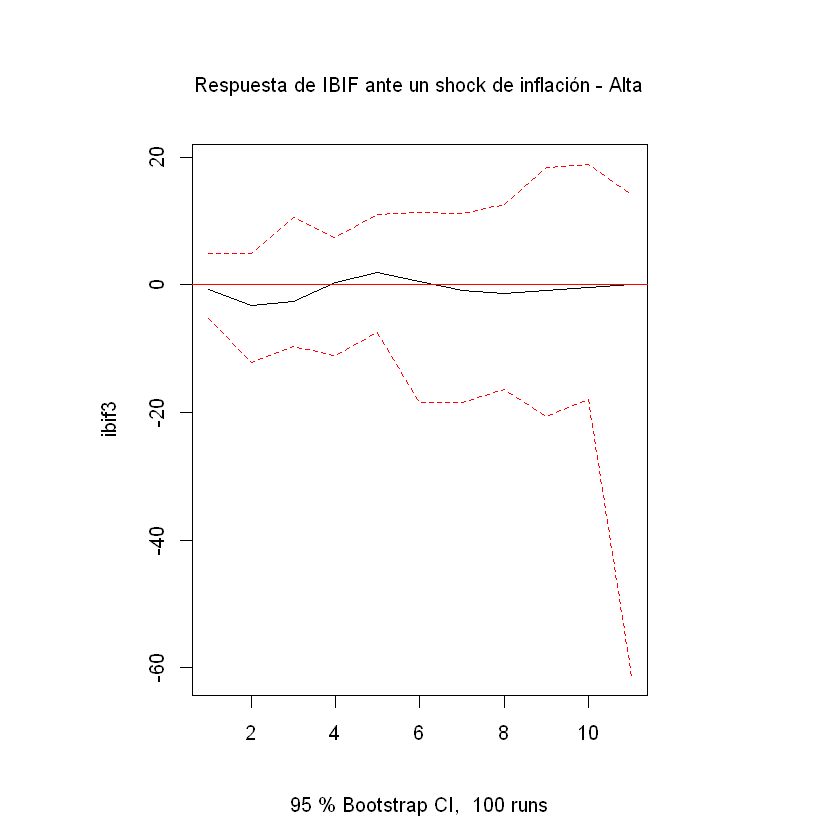

In [30]:
fun_ibif3 <- irf(svar_estimado3, impulse = "ipc3", response = "ibif3")
plot(fun_ibif3, main = "Respuesta de IBIF ante un shock de inflación - Alta")